In [1]:
import numpy as np

In [2]:
def load_velo_scan(file):
    """Load and parse a velodyne binary file."""
    scan = np.fromfile(file, dtype=np.float32)
    return scan.reshape((-1, 4))

In [3]:
get_velo = load_velo_scan('sample/000000.bin')

In [4]:
get_velo

array([[ 1.8324e+01,  4.9000e-02,  8.2900e-01,  0.0000e+00],
       [ 1.8344e+01,  1.0600e-01,  8.2900e-01,  0.0000e+00],
       [ 5.1299e+01,  5.0500e-01,  1.9440e+00,  0.0000e+00],
       ...,
       [ 3.7180e+00, -1.4060e+00, -1.7370e+00,  3.4000e-01],
       [ 3.7140e+00, -1.3910e+00, -1.7330e+00,  4.1000e-01],
       [ 3.9670e+00, -1.4740e+00, -1.8570e+00,  0.0000e+00]],
      dtype=float32)

In [5]:
get_velo.shape

(115384, 4)

In [6]:
def draw_box(pyplot_axis, vertices, axes=[0, 1, 2], color='black'):
    """
    Draws a bounding 3D box in a pyplot axis.
    
    Parameters
    ----------
    pyplot_axis : Pyplot axis to draw in.
    vertices    : Array 8 box vertices containing x, y, z coordinates.
    axes        : Axes to use. Defaults to `[0, 1, 2]`, e.g. x, y and z axes.
    color       : Drawing color. Defaults to `black`.
    """
    vertices = vertices[axes, :]
    connections = [
        [0, 1], [1, 2], [2, 3], [3, 0],  # Lower plane parallel to Z=0 plane
        [4, 5], [5, 6], [6, 7], [7, 4],  # Upper plane parallel to Z=0 plane
        [0, 4], [1, 5], [2, 6], [3, 7]  # Connections between upper and lower planes
    ]
    for connection in connections:
        pyplot_axis.plot(*vertices[:, connection], c=color, lw=0.5)

In [7]:
def draw_point_cloud(ax, title, axes=[0, 1, 2], xlim3d=None, ylim3d=None, zlim3d=None):
        """
        Convenient method for drawing various point cloud projections as a part of frame statistics.
        """
        ax.scatter(*np.transpose(velo_frame[:, axes]), s=point_size, c=velo_frame[:, 3], cmap='gray')
        ax.set_title(title)
        ax.set_xlabel('{} axis'.format(axes_str[axes[0]]))
        ax.set_ylabel('{} axis'.format(axes_str[axes[1]]))
        if len(axes) > 2:
            ax.set_xlim3d(*axes_limits[axes[0]])
            ax.set_ylim3d(*axes_limits[axes[1]])
            ax.set_zlim3d(*axes_limits[axes[2]])
            ax.set_zlabel('{} axis'.format(axes_str[axes[2]]))
        else:
            ax.set_xlim(*axes_limits[axes[0]])
            ax.set_ylim(*axes_limits[axes[1]])
        # User specified limits
        if xlim3d!=None:
            ax.set_xlim3d(xlim3d)
        if ylim3d!=None:
            ax.set_ylim3d(ylim3d)
        if zlim3d!=None:
            ax.set_zlim3d(zlim3d)
        
        '''
        for t_rects, t_type in zip(tracklet_rects[frame], tracklet_types[frame]):
            draw_box(ax, t_rects, axes=axes, color=colors[t_type])
        '''

In [8]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [9]:
colors = {
    'Car': 'b',
    'Tram': 'r',
    'Cyclist': 'g',
    'Van': 'c',
    'Truck': 'm',
    'Pedestrian': 'y',
    'Sitter': 'k'
}
axes_limits = [
    [-20, 80], # X axis range
    [-20, 20], # Y axis range
    [-3, 10]   # Z axis range
]
axes_str = ['X', 'Y', 'Z']

In [10]:
def draw_box(pyplot_axis, vertices, axes=[0, 1, 2], color='black'):
    """
    Draws a bounding 3D box in a pyplot axis.
    
    Parameters
    ----------
    pyplot_axis : Pyplot axis to draw in.
    vertices    : Array 8 box vertices containing x, y, z coordinates.
    axes        : Axes to use. Defaults to `[0, 1, 2]`, e.g. x, y and z axes.
    color       : Drawing color. Defaults to `black`.
    """
    vertices = vertices[axes, :]
    connections = [
        [0, 1], [1, 2], [2, 3], [3, 0],  # Lower plane parallel to Z=0 plane
        [4, 5], [5, 6], [6, 7], [7, 4],  # Upper plane parallel to Z=0 plane
        [0, 4], [1, 5], [2, 6], [3, 7]  # Connections between upper and lower planes
    ]
    for connection in connections:
        pyplot_axis.plot(*vertices[:, connection], c=color, lw=0.5)

In [11]:
points=0.2
points_step = int(1. / points)
point_size = 0.1 * (1. / points)
velo_range = range(0, get_velo.shape[0], points_step)
velo_frame = get_velo[velo_range, :]

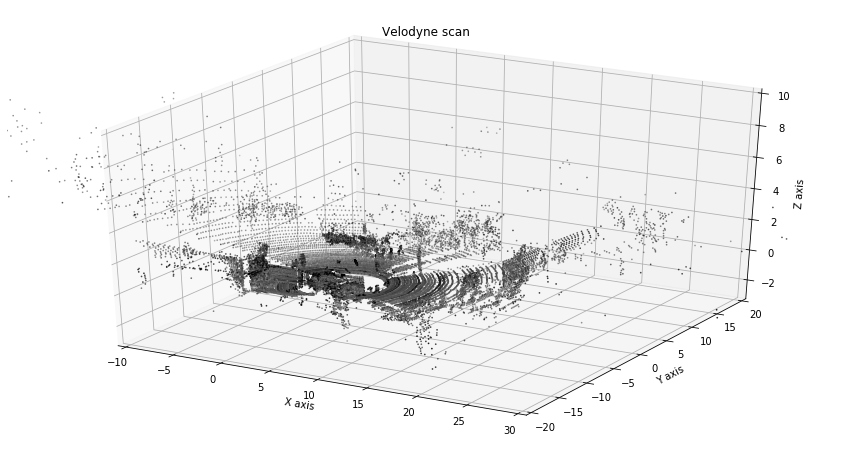

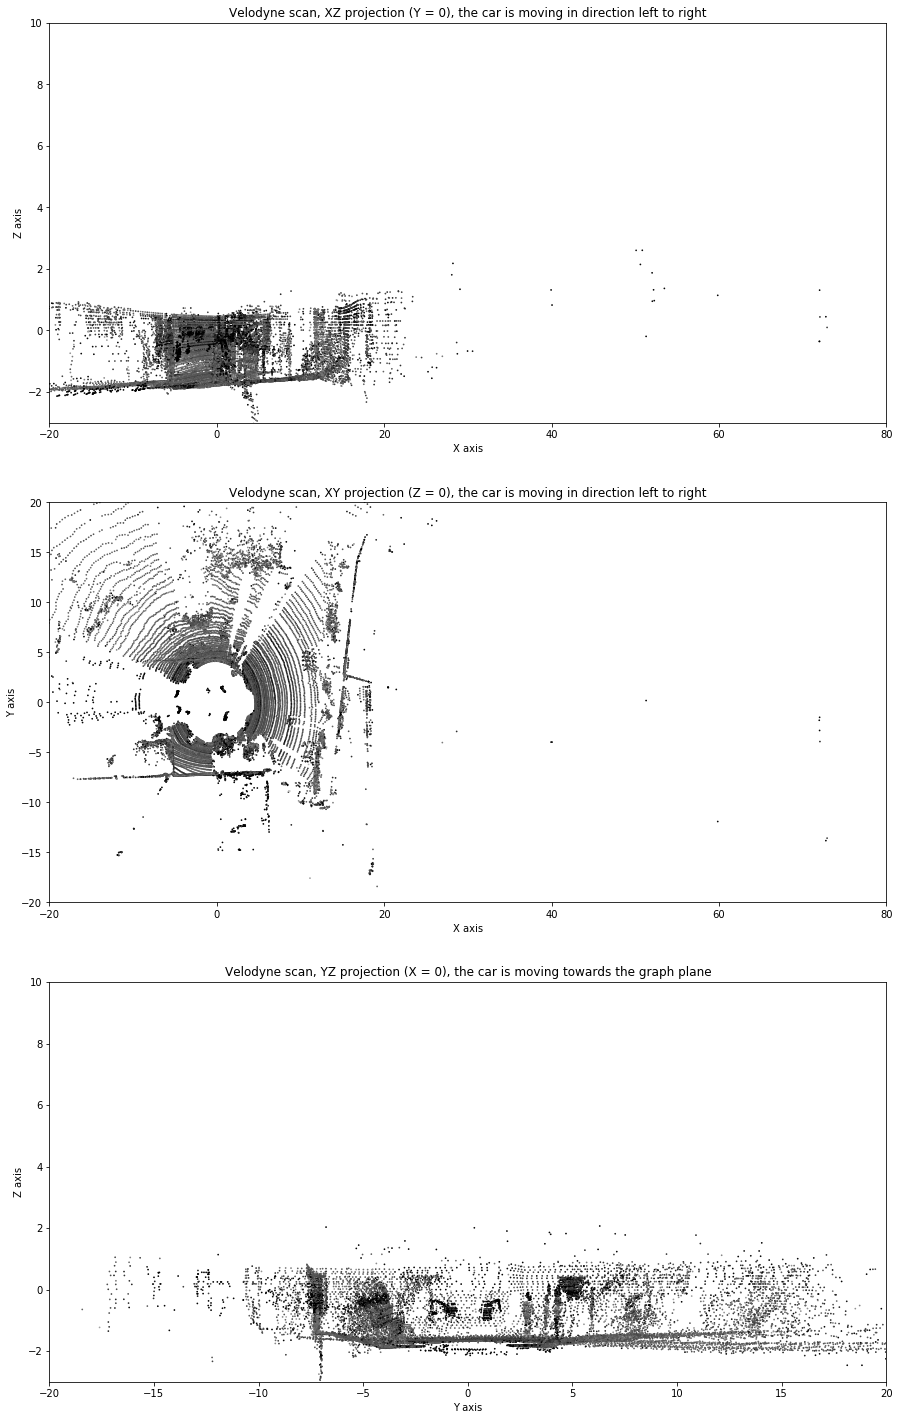

In [12]:
# Draw point cloud data as 3D plot
f2 = plt.figure(figsize=(15, 8))
ax2 = f2.add_subplot(111, projection='3d')                    
draw_point_cloud(ax2, 'Velodyne scan', xlim3d=(-10,30))
plt.show()

# Draw point cloud data as plane projections
f, ax3 = plt.subplots(3, 1, figsize=(15, 25))
draw_point_cloud(
    ax3[0], 
    'Velodyne scan, XZ projection (Y = 0), the car is moving in direction left to right', 
    axes=[0, 2] # X and Z axes
)
draw_point_cloud(
    ax3[1], 
    'Velodyne scan, XY projection (Z = 0), the car is moving in direction left to right', 
    axes=[0, 1] # X and Y axes
)
draw_point_cloud(
    ax3[2], 
    'Velodyne scan, YZ projection (X = 0), the car is moving towards the graph plane', 
    axes=[1, 2] # Y and Z axes
)
plt.show()